PHAS0029 Session 4: Fitting to arbitrary functions

_Updated: 26/01/2022_

## Intended learning outcomes:
By the end of this session, you should be able to:
<ul>
<li> fit data to any arbitrary function using scipy.optimize.curve_fit; </li>
<li> quantitatively evaluate the goodness of fit;  </li>
<li> reach physical conclusions based on these results. </li>


We've already seen how to fit histograms to a Gaussian, and how to use a polynomial to fit a set of data. The last thing we're going to do in this Data Analysis part of the course is to see how to perform a fit to an arbitrary function. 

In these examples, we'll be looking at whether a Lorentzian or Gaussian functions provide a better fit to some optical lineshape data. However, you can use the same method to fit *any* function, provided you can write a suitable Python function to describe your target "fit" function.

## Context for this example

The data we'll use for this session is taken from the Lab 3 Zeeman effect experiment, which some of you will do yourselves in PHAS0058. 

The Zeeman effect occurs when a spectral line is split into different components by a magnetic field. The physics of the Zeeman effect will be covered in detail in PHAS0023 "Atomic and Molecular Physics".

The Lab 3 experiment examines how the lines in the emission spectrum of a mercury discharge lamp split under a magnetic field. The student records the spectrum using a CCD camera, which yields data in the form of recorded intensity (in counts per second) vs pixel position (in pixels). 

We're not going to be considering the *positions* of the spectral lines in this task, instead we're going to be looking at the *lineshapes*. Rather than a spectral line with a single energy, the line is broadened into a wider peak by various physical effects. For example, the uncertainty principle leads to broadening which has a Lorentzian form, while there will also be thermal broadening effects, which are Gaussian in nature (there are also several other sources of broadening, with different effects). In theory, for this experiment, Lorentzian broadening is expected to dominate.

In this task we will look at an experimental spectral line recorded by a student in the Lab 3 experiment, fit it to both a Gaussian and Lorentzian, and determine which provides a better fit.

## Getting started with the code

First, we'll import the modules we will need. The new function we import in the cell below comes from the scipy.optimize library - more on this later, when we come to use it. 

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.optimize import curve_fit # we're importing just this one function from scipy.optimize

plt.rcParams["patch.force_edgecolor"] = True # include outlines on histograms etc

Now we can import the csv (Comma Separated Value) file with the data the student collected, and plot it. In CoCalc the file is saved in the same directory as your notebook and it is called Zeeman_data.csv.

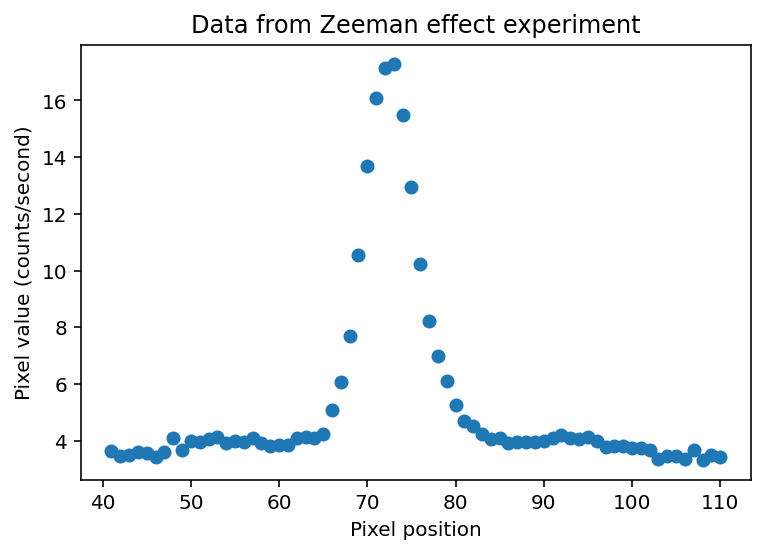

In [2]:
# import the data...
xdata,ydata = np.loadtxt('Zeeman_data.csv',delimiter=",",unpack=True) # reminder: need to set delimiter for csv files

# ...and plot it.
plt.figure()
plt.plot(xdata,ydata, 'o')
plt.xlabel("Pixel position")
plt.ylabel("Pixel value (counts/second)")
plt.title("Data from Zeeman effect experiment");

We can see that we have a single peak with a constant background level. It looks feasible to attempt fitting this to a Gaussian.


In order to use `curve_fit` to fit this to a Gaussian, we need to write a "target" function to fit to, which in this case will be


$$
f(x) = y_0 + h \exp \left(\frac{-(x-x_0)^2}{2 \sigma^2}\right)
$$

(This is a slightly different definition from the one we used when we were fitting histograms to Gaussians in Session 2. Can you see why?)

The parameters for our Gaussian fit will be the mean value (`x0`), the standard deviation (`sigma`), the background value `y0` and the peak height, `h`. Here is a function that will do exactly this.

In [3]:
def gaussian(x,x0,sigma, y0, h):
    '''Returns a single value or 1D array of Gaussian function values for 
    - input x-value or array of x-values: x
    - mean value of distribution: x0
    - standard deviation of distribution: sigma
    - background value y0
    - peak height, h (measured from background level y0)'''
    gauss = h * np.exp(-(x-x0)**2/(2*sigma**2)) + y0 # the gaussian itself
    return gauss

## curve_fit
The three parameters, x0, y0 and sigma, are (as yet) unknown. To find them, we use the scipy.optimize.curve_fit function. The full documentation for this is here: http://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html#scipy.optimize.curve_fit

We're going to do this in the simplest way possible for the moment, by just sending curve_fit the target function (our "`gaussian`" function), the independent variable (`xdata`) and the dependent variable (`ydata`). We can also, optionally, choose to send an initial guess of the parameters, as well as weightings for each of the ydata data points, but for the moment we won't do that.

The `curve_fit` routine returns two arrays. 
 * The first of these is an array of the fitted parameters - in our case this array will have four elements, as we have four parameters, `x0`, `sigma`, `y0`, and `h`.
 * The second is the matrix of covariance - an indication of the goodness of fit. We covered this in Session 3 when we were doing polynomial fitting.
 
 Let's do this, and see what results we get back:

In [4]:
#popt: Optimized parameters
#pcov: matrix of covariance.
popt,pcov = curve_fit(gaussian,xdata,ydata)

print ("popt :\n", popt)
print ("pcov :\n", pcov)

popt :
 [1.         1.         5.30499999 1.        ]
pcov :
 [[inf inf inf inf]
 [inf inf inf inf]
 [inf inf inf inf]
 [inf inf inf inf]]


We can see that this hasn't worked so well - `curve_fit` hasn't been able to find a fit to the data.

Instead, we'll try to make life easier for `curve_fit` by giving an initial guess for the parameters. From looking at the plot of the data, we can see that the peak is at around $x=75$, and the background around $y=3.5$. We'll try a value of 10 for $\sigma$. These values need to be given in the form of a python list of numbers, in the same order as parameters are given to our "`gaussian`" function. Remember - in Python we use `[` square brackets `]` to define a list, with the elements separated by commas.

In [5]:
guess = [75,10,3.5,18] # list of initial guess parameters
# what type of object does the variable "guess" represent?
print ("The variable 'guess' is a ", type(guess) )

The variable 'guess' is a  <class 'list'>


Now we can retry the fit:

In [6]:
popt,pcov = curve_fit(gaussian,xdata,ydata,p0=guess)
print ("popt :\n", popt)
print ("pcov :\n", pcov)

popt :
 [72.50930905  3.01525268  3.85742572 13.40680376]
pcov :
 [[ 2.02507205e-03 -3.77758184e-10  4.14321753e-12  1.66043777e-09]
 [-3.77758184e-10  2.22561784e-03 -6.30519920e-04 -4.05620885e-03]
 [ 4.14321753e-12 -6.30519920e-04  1.98236679e-03 -1.40174499e-03]
 [ 1.66043777e-09 -4.05620885e-03 -1.40174499e-03  3.10175058e-02]]


This has worked (or it should have done)! We can use the information from the matrix of covariance to calculate the error on each parameter, just as we did in the previous session for the polynomial coefficients. Remember, the error on the parameters are given by the *square roots* of the diagonal elements of the matrix of covariance.

### A python aside / hint:
When dealing with an array like `popt` that contains numbers each representing different variables, it's sometimes useful to be able to "unpack" the array into different variables - we've already seen examples of this in the code cell above and in the second code cell when unpacking the data from the file. To unpack `popt`, we could use a line of code like:

           x0_fit, sigma_fit, y0_fit, h_fit = popt

If we wanted to then calculate the fitted line at a given x-value (in this case at x = 65), we could then use something like:
        
           fitted_point = gaussian(65, x0_fit, sigma_fit, y0_fit, h_fit)
           
or, if we don't want/need to assign individual variable names to the elements of `popt` (or whichever array we are dealing with), we could use:

           fitted_point = gaussian(65, popt[0], popt[1], popt[2], popt[3])
           
This is a bit unwieldy though, so sometimes it's useful to be able to unpack the array automatically when calling a function by using \* syntax, like this:

           fitted_point = gaussian(65, *popt)
This is much easier to deal with! You can find a fuller discussion of this in [Hill: Learning Scientific Programming with Python](https://ucl.rl.talis.com/link?url=http%3A%2F%2Flibproxy.ucl.ac.uk%2Flogin%3Fqurl%3Dhttps%253A%252F%252Fdoi.org%252F10.1017%252FCBO9781139871754&sig=4365629c2ea92d4fcb051461f54a3acbb281f6c211fe3ec598976f845929ec6c) section 2.4.3 (page 49).

The code cell below demonstrates that the two methods do give identical results:

In [7]:
# specifying the elements by hand:
print("At x = 65 our fitted Gaussian has a value of: ", gaussian(65, popt[0], popt[1], popt[2], popt[3]))

# use *syntax to unpack the elements of popt automatically:
print("Calculating the same value using * syntax:    ", gaussian(65,*popt)) 
print("Both give the same result!")

At x = 65 our fitted Gaussian has a value of:  4.46069838805483
Calculating the same value using * syntax:     4.46069838805483
Both give the same result!


# Fitting the data

## **Task 1**: Fit data to Gaussian
*approx. 30 min*
<div class="alert alert-success"> 
In the cell below, write a function called <tt>g_fit</tt> which will:
<ul>
    <li>fit Gaussian to provided x and y data at input based on a guess array (also given as the third input)</li>
<li> calculate the errors on the parameters </li>
<li>output and print all parameters and their errors </li>
<li>plot the original data and the fitted line on a single, appropriately labelled graph.  </li>
</ul>
<br>
    <b>HINT:</b> make sure you include enough points in your fitted line to give a smooth curve, particularly at the peak. Also, make sure you use the <tt>gaussian</tt> function defined before.<br>
    <b> HINT 2:</b> all parameters should be clearly annotated and be output as part of the plot. <a href="https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.text.html">Click here</a> to learn how to insert a text box into a plot. You may find it easier to define position of the text in figure coordinates, see the <tt>fig.transFigure</tt> method <a href="https://matplotlib.org/stable/tutorials/advanced/transforms_tutorial.html"> here.</a>

</div>

mean:  72.50930904830264 with error: 0.04500080057881593
standard deviation: 3.01525267500394 with error: 0.04717645432208271
background value 3.857425720328471 with error: 0.04452377783763209
peak height 13.406803756693401 with error: 0.17611787470491008


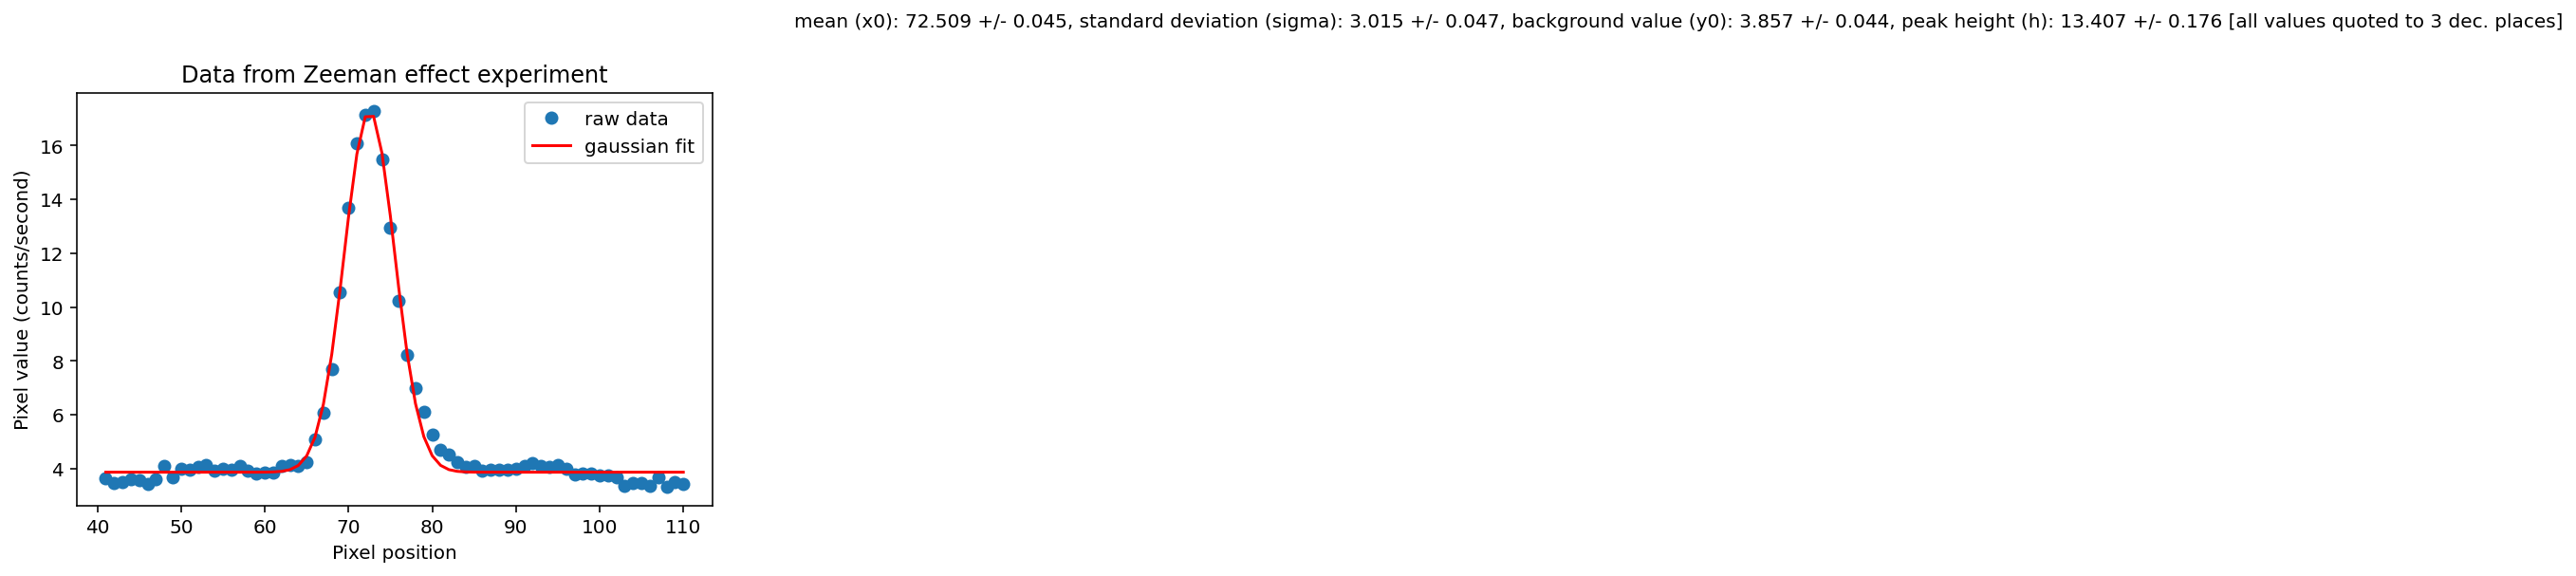

In [8]:
def g_fit(xdata, ydata, guess):
    
    '''
    This function will overall be fitting experimental data to a gaussian fit.
    It will take as inputs : x data [xdata], y data [ydata] and a guess array [guess]
    It will then calculate the values for the parameters of the gaussian fit alongside their respective errors. 
    After it will output and print all the parameter fit values and their errors.
    Lastly it will plot the original experimental data and the fitted gaussian line on a single appropriately labelled graph.
    Ouput: parameter values of the gaussian fit (popt), error in the parameter values of the gaussian fit [parameter_errors]
    '''
    
    
    #calculating the parameters of the gaussian fit and the matrix of covariance of those parameters.
    #popt: Optimized parameters.
    #pcov: matrix of covariance.
    popt,pcov = curve_fit(gaussian,xdata,ydata,p0=guess)
    
    #unpacking the parameters into separate variables
    x0_fit, sigma_fit, y0_fit, h_fit = popt
    
    
    #calculating the errors on the parameters of the gaussian fit
    parameter_errors = np.sqrt(np.diag(pcov))
    
    #printing all the parameters and their respective errors
    print("mean: ", x0_fit, "with error:", parameter_errors[0])
    print("standard deviation:", sigma_fit, "with error:", parameter_errors[1])
    print("background value", y0_fit, "with error:", parameter_errors[2])
    print("peak height", h_fit, "with error:", parameter_errors[3])
    
    fig = plt.figure()
    
    #plotting the raw experimental data
    plt.plot(xdata, ydata, 'o', label='raw data')
    
    #y-values of the Gaussian fit
    gaussian_values = gaussian(xdata, *popt)
    
    #plotting the gaussian fit
    plt.plot(xdata, gaussian_values, '-', color="red", label='gaussian fit')
    
    #x-axis label of the graph
    plt.xlabel("Pixel position")
    
    #y-axis label of the graph
    plt.ylabel("Pixel value (counts/second)")
    
    #legend of the graph
    plt.legend()
    
    #title of the graph
    plt.title("Data from Zeeman effect experiment");
    
    #string variable containing the gaussian parameters
    string = "mean (x0): 72.509 +/- 0.045, standard deviation (sigma): 3.015 +/- 0.047, background value (y0): 3.857 +/- 0.044, peak height (h): 13.407 +/- 0.176 [all values quoted to 3 dec. places]" 
    
    #inserting a text box into plot inorder to output the parameters of the gaussian fit 
    plt.text(1, 1, string , transform= fig.transFigure)
   

    #returning the parameters of the gaussian fit (popt) and the paramaters errors (parameter_errors).
    return popt, parameter_errors
    
    


a,b =g_fit(xdata,ydata,[75,10,3.5,18])

<div class="alert alert-info">
    <font size="+1"> <b>Checkpoint 1:  </b></font> Run the next cell to check if your function <tt>g_fit</tt> works correctly. 
</div>

In [9]:
%run -i c4checkpoint1.py

************
 Well done! All test passed. You can move to the next part of the task.
************


<Figure size 432x288 with 0 Axes>

## Lorentzian
If you've done the above correctly, you should obtain a good fit to the data.

In theory we'd expect a Lorentzian to produce a better fit for this data. Now you're going to try this out and see if this is what we find for this particular data set!

The appropriate form for this is 
$$
f(x) = y_0 + \frac{h}{1 + ((x - x_0)/b)^2}
$$
where $y_0$ is the background level, $x_0$ is the peak position and $b$ is the half-width at half-maximum (HWHM) of the peak, and $h$ the height of the peak relative to the background level.

## **Task 2**: Define Lorentzian
<div class="alert alert-success"> 
<i>approx. 10 min</i><br>
First, write a properly formatted python function called <tt>lorentzian</tt>, similar in form to the <tt>gaussian</tt> function above, that will return a Lorentzian function for these parameters.<br>
<b>HINT</b>: your function should now have 5 inputs but still one output. The expected order of inputs should be $x$, $x_0$, $b$, $y_0$ and $h$.
</div>

In [10]:
def lorentzian(x,x0,b,y0,h):
    '''Returns a single value or 1D array of Lorentzian function values for 
    - input x-value or array of x-values: x
    - x-value of the peak position: x0
    - standard deviation of distribution: sigma
    - half-width at half-maximum (HWHM) of the peak: b
    - background value y0
    - peak height, h (measured from background level y0)'''
    
    
    lorentz = y0 + h/(1 + ((x-x0)/b)**2) # the lorentzian itself
    
    return lorentz

<div class="alert alert-info">
    <font size="+1"> <b>Checkpoint 2:  </b></font> Run the next cell to check if your function <tt>lorentzian</tt> works correctly. 
    </div>

In [11]:
%run -i c4checkpoint2.py

************
 Well done! All test passed. You can move to the next part of the task.
************


## **Task 3**: Double fit
<div class="alert alert-success">    

<i>approx. 40 min</i><br>
Now write a function named <tt>double_fit</tt> which:
<ul>
<li>uses <tt>curve_fit</tt> to calculate the best Gaussian and best Lorentzian fit for this data provided initial guesses for their parameters</li>
<li>calculates the error on each parameter</li>
<li>outputs each parameter with its error (as four arrays: gaussian coefficients, their errors, lorentzian coefficients, their errors)</li>
        <li>plots the data, <b>the fitted Gaussian</b> and the fitted Lorentzian, all on the same labelled graph. Your graph should contain all parameters with their errors in a suitable format (e.g. the value for $x_0=45 \pm 3$)</li>
</ul>
<b>HINT</b>: you can re-use most of the code from your previous function <tt>g_fit</tt>. <br>
    <b>HINT 2</b>: your function will need two arrays of guessed parameters - one for each fit. The expected input should be: x data, y data, guess for Lorentzian and guess for Gaussian.<br>
    <b>HINT 3</b>: use plt.text to tidy up your plot.
</div>

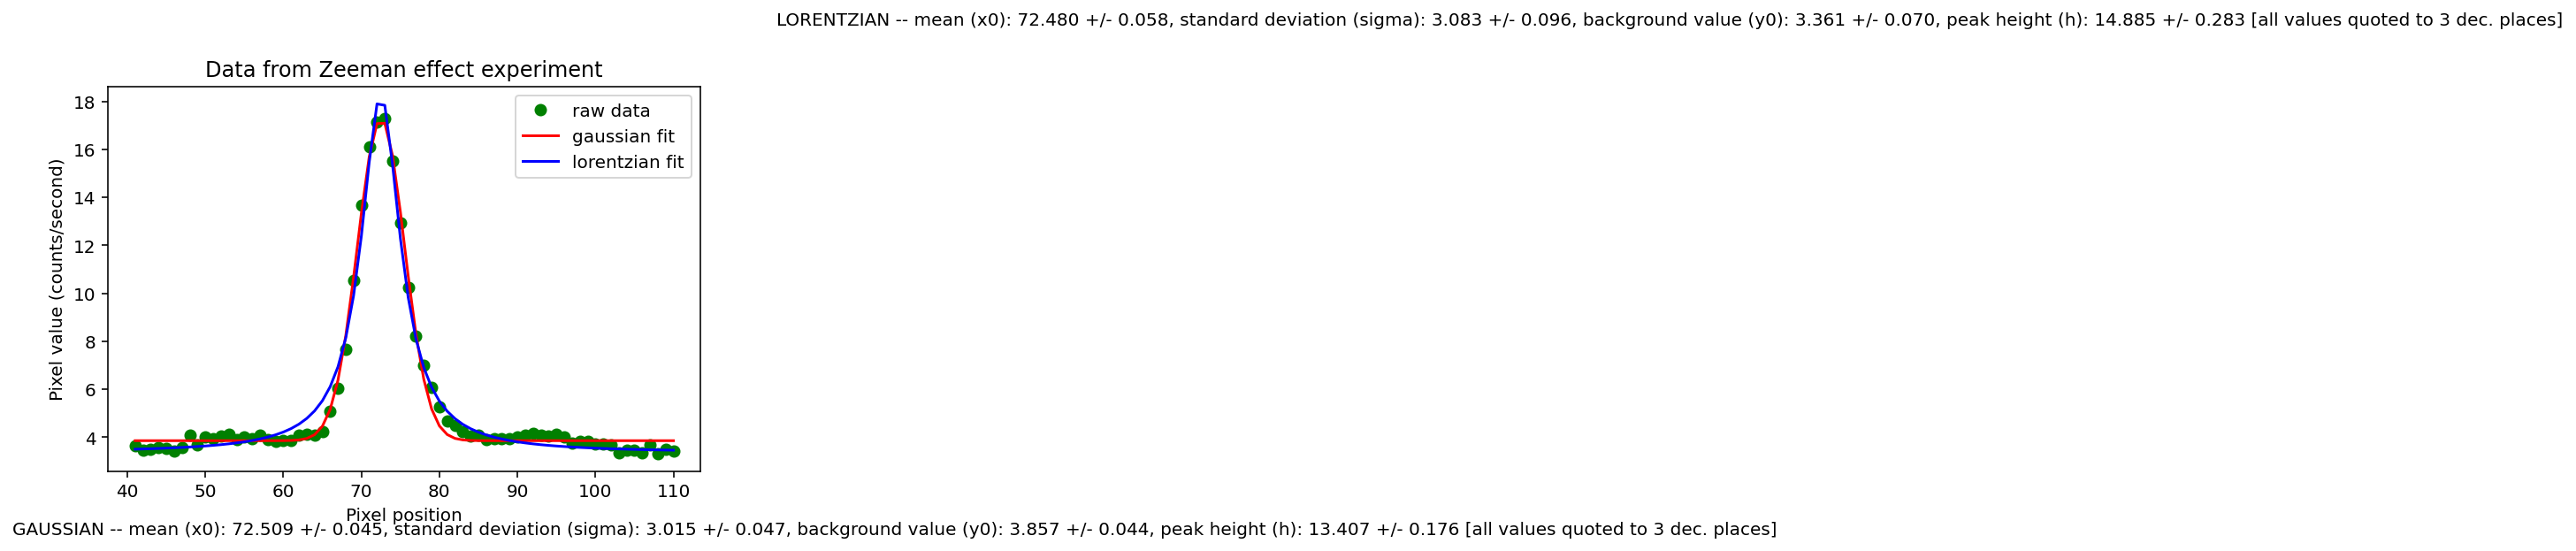

In [12]:
def double_fit(xdata, ydata, lorentz_guess, guess):
    
    
    #calculating the optimized parameters of the lorentzian fit
    popt_lorentz,pcov_lorentz = curve_fit(lorentzian, xdata, ydata, p0= lorentz_guess)
    
    #calculating the optimized parameters of the gaussian fit
    popt_gauss,pcov_gauss = curve_fit(gaussian,xdata,ydata,p0=guess)
    
    #calculating the errors in the lorentz fit parameters
    parameter_errors_lorentz = np.sqrt(np.diag(pcov_lorentz))
    
    #calculating the errors in the gaussian fit parameters
    parameter_errors_gauss = np.sqrt(np.diag(pcov_gauss))
    
    
    fig = plt.figure()
    
    #y-values of the Gaussian
    y_gauss = gaussian(xdata, *popt_gauss)
    
    #y-values of the Lorentzian
    y_lorentz = lorentzian(xdata, *popt_lorentz)
    
    #plotting the raw experimental data
    plt.plot(xdata, ydata, 'o', color="green", label='raw data')
    
    #plotting the gaussian fit
    plt.plot(xdata, y_gauss, '-', color="red", label='gaussian fit')

    #plotting the lorentzian fit
    plt.plot(xdata, y_lorentz, '-', color="blue", label='lorentzian fit')
    
    #x-axis label of the graph
    plt.xlabel("Pixel position")
    
    #y-axis label of the graph
    plt.ylabel("Pixel value (counts/second)")
    
    #legend of the graph
    plt.legend()
    
    #title of the graph
    plt.title("Data from Zeeman effect experiment");
    
    
    #string variable containing the lorentzian parameters and errors
    string = "LORENTZIAN -- mean (x0): 72.480 +/- 0.058, standard deviation (sigma): 3.083 +/- 0.096, background value (y0): 3.361 +/- 0.070, peak height (h): 14.885 +/- 0.283 [all values quoted to 3 dec. places]" 
    
    #inserting a text box into plot inorder to output the parameters of the gaussian fit 
    plt.text(1, 1, string , transform= fig.transFigure)
    
    #string variable containing the lorentzian parameters and errors
    string1 = "GAUSSIAN -- mean (x0): 72.509 +/- 0.045, standard deviation (sigma): 3.015 +/- 0.047, background value (y0): 3.857 +/- 0.044, peak height (h): 13.407 +/- 0.176 [all values quoted to 3 dec. places]" 
    
    #inserting a text box into plot inorder to output the parameters of the gaussian fit 
    plt.text(0, 0, string1 , transform= fig.transFigure)
    
    
    return popt_gauss, parameter_errors_gauss, popt_lorentz, parameter_errors_lorentz

lorentz_guess = [72,3.9,3,18]
poptg,perrg,poptl,perrl=double_fit(xdata,ydata,lorentz_guess,guess)

<div class="alert alert-info">
    <font size="+1"> <b>Checkpoint 3:  </b></font> Run the next cell to check if your function <tt>double_fit</tt> works correctly. 
    </div>

In [13]:
%run -i c4checkpoint3.py

************
 Well done! All test passed. You can move to the next part of the task.
************


<Figure size 432x288 with 0 Axes>

# Evaluating the goodness of fit

So now we have two potential fits to our data. Looking at them, it's hard to tell which one provides the better fit. We can do this quantitatively by calculating $\chi^2$ for each fit, in the same way as we did in the previous session. 

We'll also need to know the y-error on the data points for this - which for this experiment were estimated to be $\pm 1$ counts/second.

## **Task 4**: Chi squared
<div class="alert alert-success"> 

<i>approx. 20 min</i><br>
In the cell below, define a new function <tt>eval_fit</tt> that uses output of your <tt>double_fit</tt> function and:
    
<ul>
<li>calculates the residuals divided by the y-error</li>
<li>calculates the number of degrees of freedom</li>
<li>hence calculates $\chi^2$ for the fit</li>
    <li><b>works for either Gaussian or Lorentzian fit</b></li>
</ul>
    
Refer back to the previous session if you need a reminder of any of the definitions. Your function should have <b>five</b> inputs: fit function (<tt>lorentzian</tt> or <tt>gaussian</tt>) x- and y-data, fit coefficients and y-errror. The outputs should be: the residuals, number of degrees of freedom and reduced $\chi^2$.
    
<b>HINT:</b> set a variable to use for the y-error, then you'll be able to experiment with this value later.
</div>


In [14]:
def eval_fit(fit, xdata, ydata, param, y_error):
    '''
    This function uses the output of the double_fit function and
    calculates the residuals divided by the y-error
    calculates the number of degrees of freedom
    calculates chi^2 for the fit
    and works for either gaussian or lorentzian fit
    Input: fit , x data [xdata], y data [ydata], fit parameters [param], y-error [y_error]
    Ouput: residuals [new_residuals], number of degrees of freedom [num_degrees_of_freedom], chi-squared [reduced_chi_squared]
    
    '''
    
    #calculating the residuals
    residuals = ydata - fit(xdata,*param)
    
    #calculating the residuals divided by the y-error
    new_residuals = residuals/y_error
    
    
    #calulating the number of degrees of freedom
    num_degrees_of_freedom = len(ydata) - len(param)
    
    #calculating the squares of the new residuals
    squares_of_new_residuals = np.square(new_residuals)
    
    #calculating the sum of the squares of the new residuals
    sum_of_squares_of_new_residuals = np.sum(squares_of_new_residuals)
    
    #calculating chi-squared
    reduced_chi_squared = sum_of_squares_of_new_residuals/num_degrees_of_freedom
    
    return new_residuals, num_degrees_of_freedom, reduced_chi_squared
   
    
    

<div class="alert alert-info">
    <font size="+1"> <b>Checkpoint 4:  </b></font> Run the next cell to check if your function <tt>eval_fit</tt> works correctly. 
    </div>

In [15]:
%run -i c4checkpoint4.py

************
 Well done! All test passed. You can move to the next part of the task.
************


<Figure size 432x288 with 0 Axes>

## Comparison and discussion
<div class="alert alert-success">

<i>approx. 10 min</i><br>
Run your evaluation function for both distributions in the cell below and compare their goodness of fit. <b> Are these the results you'd expect? Discuss briefly in a text cell.</b>
</div>

In [16]:
# comparing both fits
a=eval_fit(lorentzian,xdata,ydata,poptl,1.0)
b=eval_fit(gaussian,xdata,ydata,poptg,1.0)
print('For a Gaussian fit the chi squared is ', a[2],'.\nFor a Lorentzian fit the chi squared is ',b[2])


For a Gaussian fit the chi squared is  0.19277556427136613 .
For a Lorentzian fit the chi squared is  0.10698194422306873


## **Task 5**: Analysing the residuals

Another way of verifying the validity of our fits is to check the distribution of the residuals, and see if they follow a normal (Gaussian) distribution. Again, follow a similar procedure as we did in the previous session and check the distribution of the calculated residuals for both fits. 
<div class="alert alert-success">

<i>approx. 20 min</i><br>
Create a function <tt>fit_residuals</tt> that fits an input array of residuals to a Gaussian distribution using <tt>stats.norm.fit</tt> method and returns $x_0$, $\sigma$ and a histogram with a fitted line.
<ul>
<li>You can copy, paste and edit code from Session 3 if you want, rather than writing this from scratch. </li>
    <li>Make sure your plot contains $x_0$ and $\sigma$ in the title.</li>
</ul>
</div>

In [17]:
def fit_residuals(residuals):
    
    '''
    This function fits an input array of residuals to a Gaussian distribution. And returns x0, sigma and a histogram with a fitted line.
    Input: residual dataset [residuals]
    Output: mean [x0, standard deviation [sigma]
    
    '''
    #finding the actual mean (x0) and standard deviation (sigma) of 'residuals' dataset
    x0, sigma = stats.norm.fit(residuals)
    
    #generates the probability density function ("pdf"), i.e. a Gaussian (fitted line)
    gaussian = stats.norm.pdf(xdata,x0,sigma)
    
    #plotting the histogram of residual values (histogram)
    plt.hist(residuals, density=True,alpha=0.05,edgecolor='k')
    
    #plotting the gaussian (the fitted line)
    plt.plot(xdata,gaussian,'b-', label='Gaussian')
    
    #legend of my graph
    plt.legend()
    
    #x-axis label 
    plt.xlabel('residuals')
    
    #y-axis label
    plt.ylabel('normalised frequency')
    
    #title of graph
    title_label=(f'Line fitted with Gaussian $x_0$ = {x0:8.2e}, $\sigma$ = {sigma:8.2e}') # n.b. number format 8.2e : *e*xponential format, *8* chars total,     with *2* decimal places
    
    #title of graph
    plt.title(title_label) ;

    
    
    return x0, sigma

<div class="alert alert-info">
    <font size="+1"> <b>Checkpoint 5:  </b></font> Run the next cell to check if your function <tt>fit_residuals</tt> works correctly. 
    </div>

In [18]:
%run -i c4checkpoint5.py

************
 Well done! All test passed. You can move to the next part of the task.
************


<Figure size 432x288 with 0 Axes>

# Drawing conclusions
## **Task 7**: Final discussion
<div class="alert alert-success">

<i>approx. 30 min</i><br>Use the cell below to provide a concise summary of the fits. Try changing your value of the yerror in the data (that you used to calculate the $\chi^2$) to the $\sigma$ you obtain here. What does this tell you?
    <br>Use a text cell to discuss what you conclude from these results.
</div>

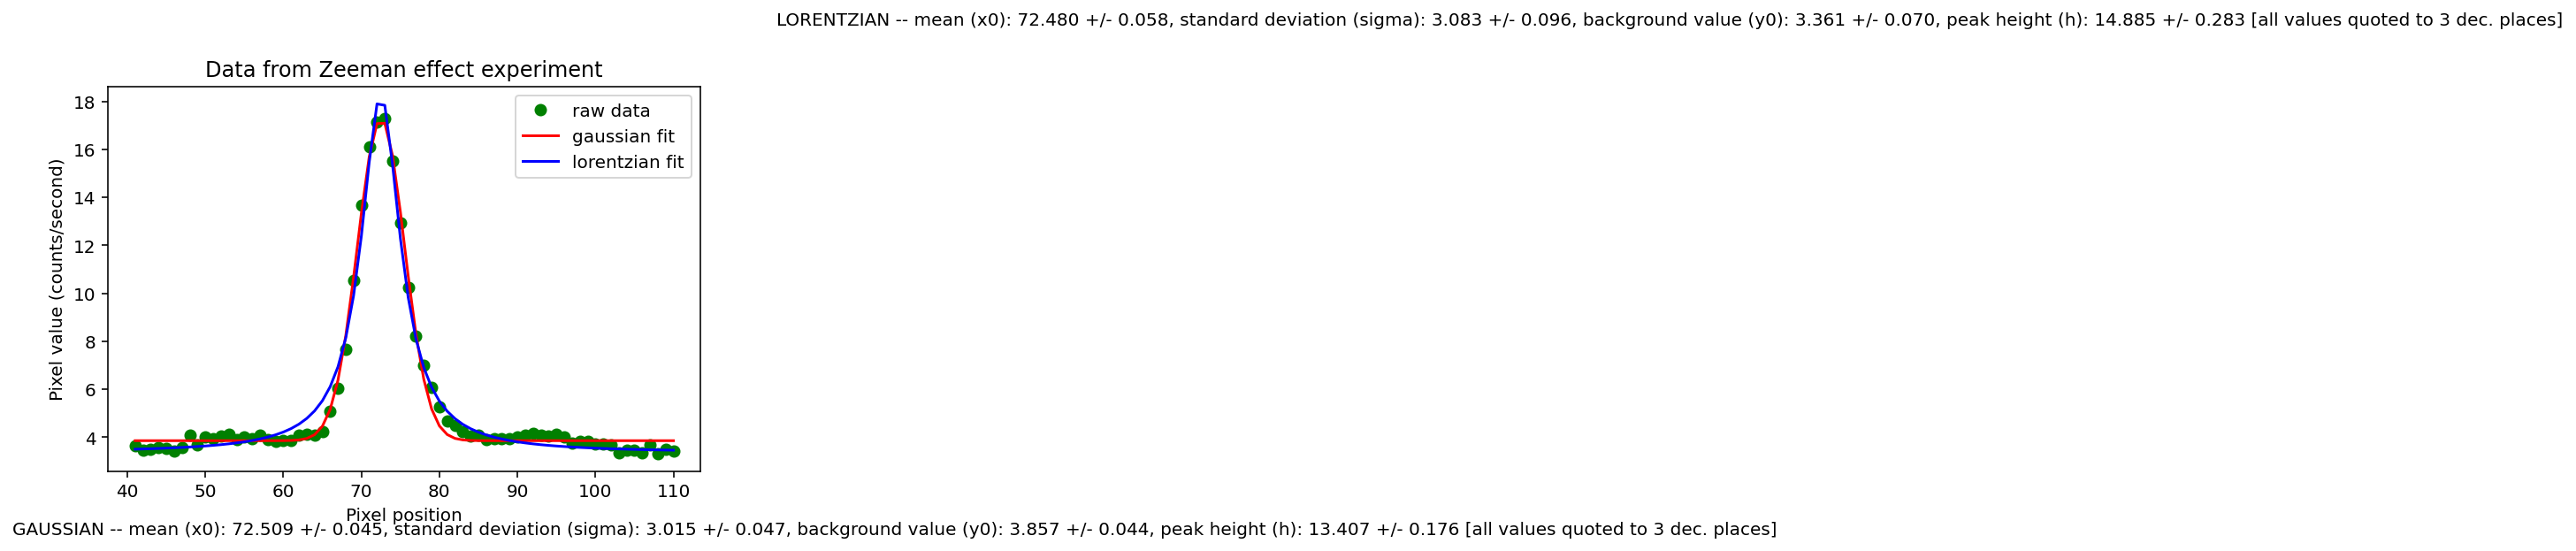

Residuals for Gauusian fit to the data:


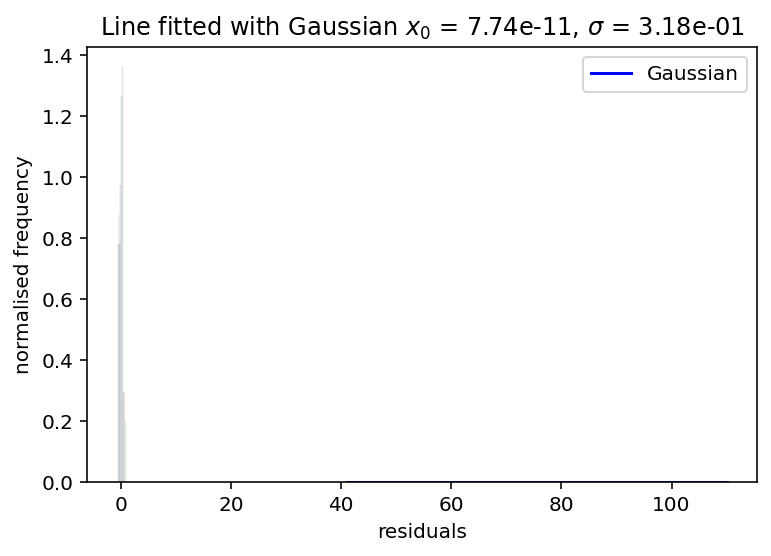

Residuals for Lorentzian fit to the data:


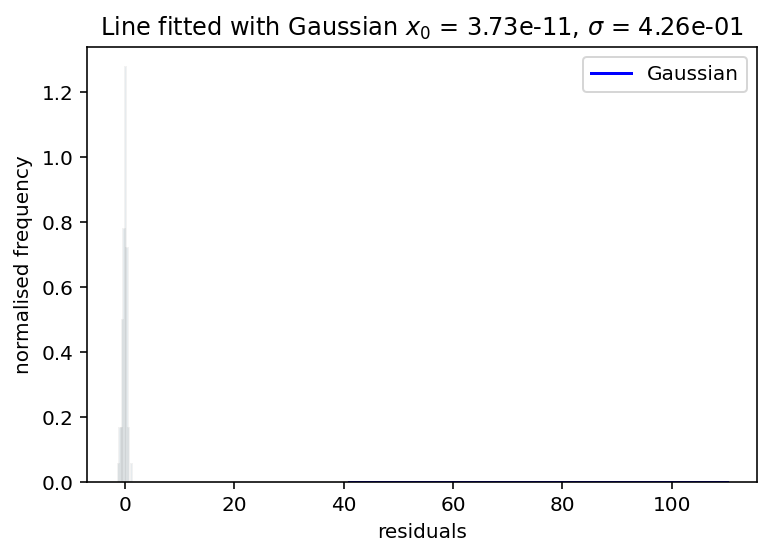

In [19]:
#code combining all functions from this notebook to analysie the Zeeman data
#define initial variables
yerr=1.0
lorentz_guess = [72,3.9,3,18]
guess = [75,10,3.5,18]

#perform and evaluate fits
poptg,perrg,poptl,perrl=double_fit(xdata,ydata,lorentz_guess,guess);
resl,dofl,chi2l=eval_fit(lorentzian,xdata,ydata,poptl,yerr);
resg,dofg,chi2g=eval_fit(gaussian,xdata,ydata,poptg,yerr);
plt.show() #this line forces the plots from double_fit to be printed before the next line; try removing it and see what changes!

print('Residuals for Gauusian fit to the data:')
fit_residuals(resg);
plt.show()
print('Residuals for Lorentzian fit to the data:')
fit_residuals(resl);

Text accompanying the plots, containing fitted coefficients, etc.

General quality of plots

General quality of docstrings and code comments

General quality of markdown cells